<a href="https://colab.research.google.com/github/ReynaldiFahreza/Tugas/blob/main/Reynaldi_FahrezaLeaf_image_process_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single image preprocessing and feature extraction - Testfile

This file explores the techniques to be used for preprocessing and feature extraction for the Flavia leaves dataset images.

### Importing necessary libraries

In [13]:
pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import os
import zipfile
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#import mahotas

### Reading the image

###### Note: 'Flavia leaves dataset' should be in the project root containing Flavia images.

In [15]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [16]:
with zipfile.ZipFile('My Drive/LeafData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [33]:
ds_path = "/content/Soybean___healthy"

In [36]:
test_img_path = ds_path + "/0007ca44-b81d-475c-b8b5-c226a041f020___RS_HL 6331.JPG"
test_img_path

'/content/Soybean__healthy/0007ca44-b81d-475c-b8b5-c226a041f020___RS_HL 6331.JPG'

In [39]:
main_img = cv2.imread("/content/Soybean___healthy/0007ca44-b81d-475c-b8b5-c226a041f020___RS_HL 6331.JPG")
print(main_img)

[[[177 162 170]
  [179 164 172]
  [180 165 173]
  ...
  [149 139 151]
  [148 138 150]
  [144 134 146]]

 [[175 160 168]
  [175 160 168]
  [175 160 168]
  ...
  [155 145 157]
  [154 144 156]
  [158 148 160]]

 [[171 156 164]
  [170 155 163]
  [169 154 162]
  ...
  [159 149 161]
  [156 146 158]
  [165 155 167]]

 ...

 [[180 173 180]
  [176 169 176]
  [145 138 145]
  ...
  [159 152 165]
  [154 147 160]
  [183 176 189]]

 [[209 202 209]
  [213 206 213]
  [216 209 216]
  ...
  [159 152 165]
  [151 144 157]
  [177 170 183]]

 [[215 208 215]
  [236 229 236]
  [201 194 201]
  ...
  [174 167 180]
  [152 145 158]
  [164 157 170]]]


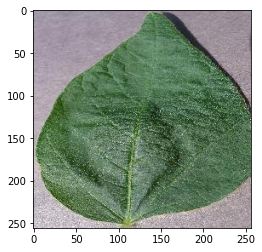

In [42]:
main_img = cv2.imread("/content/Soybean___healthy/0007ca44-b81d-475c-b8b5-c226a041f020___RS_HL 6331.JPG")
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Converting image to grayscale

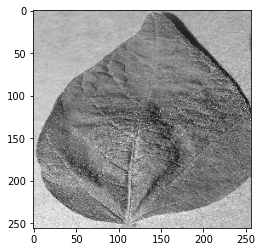

In [44]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [45]:
gs.shape

(256, 256)

### Smoothing image using Guassian filter of size (25,25)

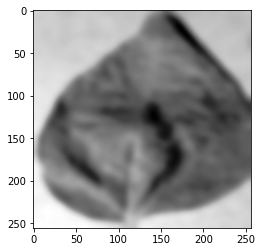

In [46]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

### Adaptive image thresholding using Otsu's thresholding method

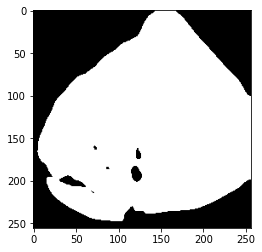

In [47]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

### Closing of holes using Morphological Transformation

Performed so as to close any holes present in the leaf

In [48]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

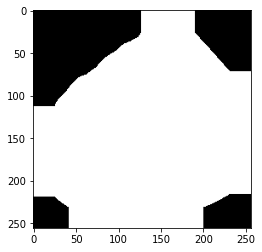

In [49]:
plt.imshow(closing,cmap='Greys_r')

# Boundary extraction

Boundary extraction is needed which will be used in calculation of shape features.

### Boundary extraction using sobel filters - Not effective

Trying to extract the boundary of the leaf using sobel filters. The image after edge extraction is thresholded using Otsu's method. Then the gaps were closed using Closing operation of Morphological Transformation.

This method is not effective as even after performing morphological transformation, gaps still persist.

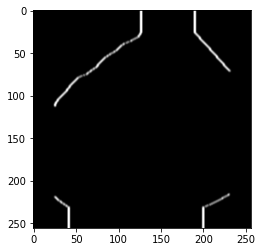

In [50]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')

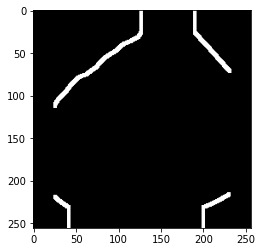

In [51]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')

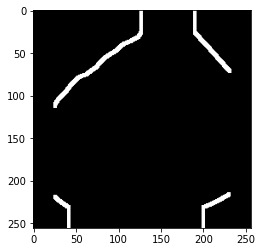

In [52]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')

### Boundary extraction using contours - Effective 

Contours are used to extract leaf boundaries. They are continous, sharp and there are no gaps between the boundary pixels

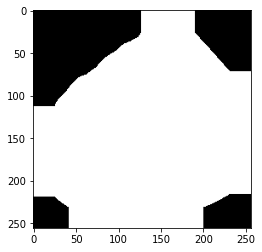

In [53]:
plt.imshow(closing,cmap="Greys_r")

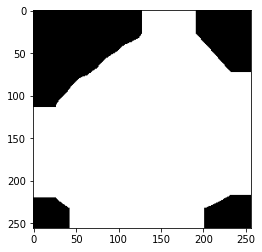

In [54]:
kernel = kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap="Greys_r")

In [55]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [56]:
len(contours)

1

In [57]:
index = 0
if len(contours) > 1:
  list_len = [len(c) for c in contours]
  index = list_len.index(max(list_len))
  cnt = contours[index]
else:
  cnt = contours[0]

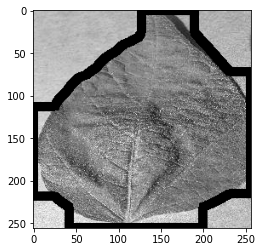

In [58]:
plottedContour = cv2.drawContours(gs,contours,index,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

## Morphological processing

## 1. Shape based features

### Calculating moments using contours

In [59]:
M = cv2.moments(cnt)
M

{'m00': 48408.5,
 'm10': 6484060.5,
 'm01': 6965758.333333333,
 'm20': 1074485462.0833333,
 'm11': 900751435.4583333,
 'm02': 1187471862.25,
 'm30': 197490128550.35,
 'm21': 147702059687.56665,
 'm12': 150725007608.2,
 'm03': 221708459617.2,
 'mu20': 205980125.87873578,
 'mu11': -32274757.497707605,
 'mu02': 185131588.15758276,
 'mu30': -1611350291.3713074,
 'mu21': 1734655180.5778694,
 'mu12': 957857729.8784714,
 'mu03': -2442378066.484131,
 'nu20': 0.08789862225158449,
 'nu11': -0.013772720574132638,
 'nu02': 0.07900185255678199,
 'nu30': -0.003125258159803229,
 'nu21': 0.003364411380055846,
 'nu12': 0.0018577913829560216,
 'nu03': -0.004737059361008337}

In [60]:
area = cv2.contourArea(cnt)
area

48408.5

In [61]:
perimeter = cv2.arcLength(cnt,True)
perimeter

932.7178170681

### Fitting in the best-fit rectangle and ellipse

The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

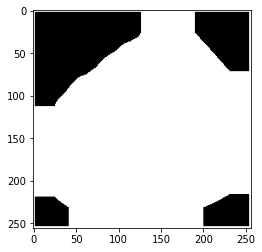

In [62]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")

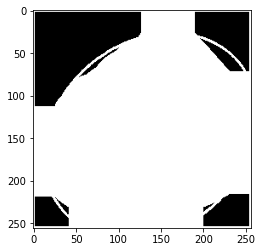

In [63]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [64]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.0

In [65]:
rectangularity = w*h/area
rectangularity

1.353811830566946

In [66]:
circularity = ((perimeter)**2)/area
circularity

17.971276248515892

In [67]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

248.26521403795604

In [68]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

## 2. Color based features

### Calculating color based features - mean, std-dev of the RGB channels

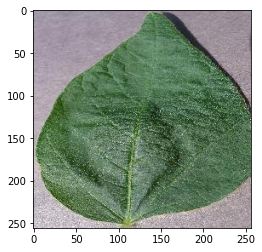

In [69]:
plt.imshow(img,cmap="Greys_r")

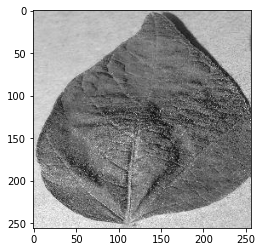

In [70]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

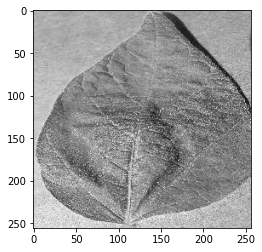

In [71]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

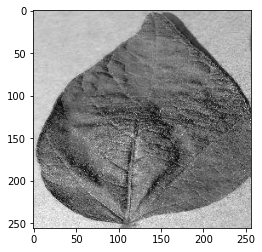

In [72]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [73]:
np.mean(blue_channel)

110.37287902832031

In [74]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [75]:
red_mean = np.mean(red_channel)
red_mean

111.5452880859375

In [76]:
green_mean = np.mean(green_channel)
green_mean

129.531982421875

In [77]:
blue_mean = np.mean(blue_channel)
blue_mean

110.32618713378906

In [78]:
red_var = np.std(red_channel)
red_var

47.496180263923335

## 3. Texture based features 

### Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [81]:
import mahotas as mt

In [82]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

AttributeError: ignored

In [83]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

NameError: ignored